In [285]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [286]:
tf=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")
tf_1=pd.read_csv("test.csv")

In [287]:
print(tf.head(),tf_1.head())

  unique_id  amount      date_time_of_pickup  longitude_of_pickup  \
0   26:21.0     4.5  2009-06-15 17:26:21 UTC           -73.844311   
1   52:16.0    16.9  2010-01-05 16:52:16 UTC           -74.016048   
2   35:00.0     5.7  2011-08-18 00:35:00 UTC           -73.982738   
3   30:42.0     7.7  2012-04-21 04:30:42 UTC           -73.987130   
4   51:00.0     5.3  2010-03-09 07:51:00 UTC           -73.968095   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.721319            -73.841610            40.712278   
1           40.711303            -73.979268            40.782004   
2           40.761270            -73.991242            40.750562   
3           40.733143            -73.991567            40.758092   
4           40.768008            -73.956655            40.783762   

   no_of_passenger  
0                1  
1                1  
2                2  
3                1  
4                1                              key          pickup_dat

In [288]:
print(tf.shape,tf_1.shape)

(50000, 8) (9914, 7)


In [289]:
print(tf.isnull().sum(),tf_1.isnull().sum())

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64 key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [290]:
print(tf.dtypes,tf_1.dtypes)

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object


In [291]:
tf.drop("unique_id",axis=1,inplace=True)

In [292]:
tf.drop("date_time_of_pickup",axis=1,inplace=True)
tf_1.drop("pickup_datetime",axis=1,inplace=True)

In [293]:
tf.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [294]:
tf_1.head()

,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,-73.966046,40.789775,-73.988565,40.744427,1


In [295]:
def detect_outliers(data):
  outliers=[]
  threshold=3
  mean=np.mean(data)
  std=np.std(mean)

  for i in data:
    z_score=(i-mean)/std
    if np.abs(z_score)>threshold:
      outliers.append(i)
  return outliers    

In [296]:
outliers_pt=detect_outliers(tf["amount"])
outliers_pt

[4.5,
 16.9,
 5.7,
 7.7,
 5.3,
 12.1,
 7.5,
 16.5,
 9.0,
 8.9,
 5.3,
 5.5,
 4.1,
 7.0,
 7.7,
 5.0,
 12.5,
 5.3,
 5.3,
 4.0,
 10.5,
 11.5,
 4.5,
 4.9,
 6.1,
 7.3,
 6.5,
 4.5,
 9.3,
 4.5,
 5.5,
 22.54,
 31.9,
 5.7,
 18.1,
 58.0,
 4.5,
 5.3,
 9.0,
 9.8,
 8.1,
 10.9,
 17.5,
 12.1,
 5.3,
 6.9,
 4.5,
 3.3,
 3.3,
 9.0,
 9.7,
 5.5,
 8.0,
 7.5,
 25.5,
 15.3,
 34.67,
 9.7,
 13.7,
 6.5,
 5.0,
 4.5,
 4.9,
 7.0,
 7.3,
 7.5,
 8.5,
 16.5,
 11.5,
 5.0,
 6.9,
 3.7,
 6.9,
 10.1,
 16.5,
 15.07,
 7.7,
 24.9,
 7.0,
 8.5,
 5.7,
 5.0,
 8.5,
 17.0,
 8.0,
 12.0,
 12.5,
 7.5,
 6.9,
 5.0,
 10.5,
 7.7,
 11.0,
 5.7,
 9.0,
 13.5,
 7.5,
 9.0,
 14.0,
 5.7,
 10.0,
 5.7,
 9.7,
 14.1,
 7.7,
 52.0,
 11.3,
 8.5,
 12.9,
 9.5,
 9.0,
 10.0,
 35.0,
 9.0,
 17.0,
 6.1,
 14.5,
 3.7,
 32.5,
 5.3,
 11.5,
 4.0,
 10.5,
 17.7,
 8.0,
 5.0,
 19.0,
 8.0,
 7.3,
 6.5,
 8.0,
 16.5,
 49.57,
 10.5,
 22.5,
 11.5,
 12.5,
 5.5,
 6.5,
 16.5,
 9.0,
 8.9,
 10.9,
 8.9,
 8.5,
 17.0,
 12.5,
 52.5,
 16.0,
 8.0,
 17.3,
 5.7,
 5.5,
 16.5,
 12.9,
 10.1,


<Axes: ylabel='amount'>

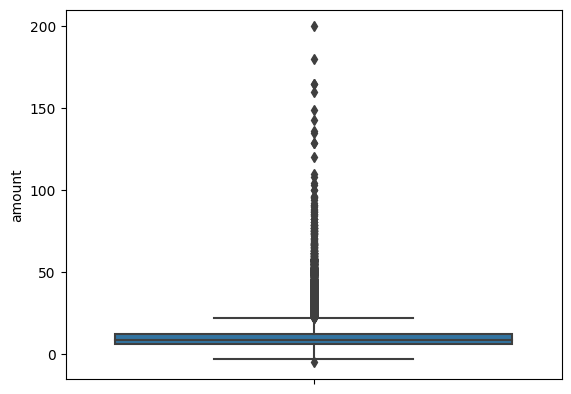

In [297]:
sns.boxplot(y="amount",data=tf)

In [298]:
def remove_outliers(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lr=Q1-1.5*(IQR)
  ur=Q3+1.5*(IQR)
  return lr,ur

In [299]:
low_amount,high_amount=remove_outliers(tf["amount"])
tf["amount"]=np.where(tf["amount"]>high_amount,high_amount,tf["amount"])
tf["amount"]=np.where(tf["amount"]<low_amount,low_amount,tf["amount"])

<Axes: ylabel='amount'>

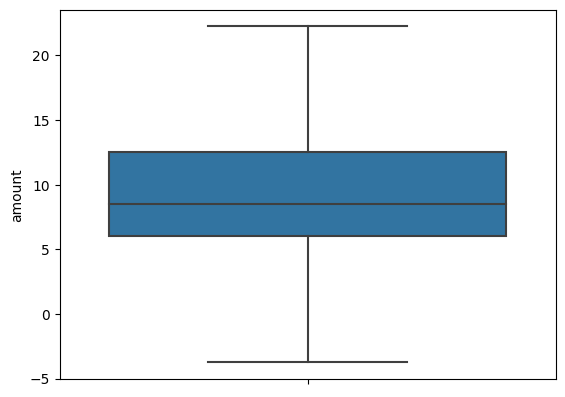

In [300]:
sns.boxplot(y="amount",data=tf)

In [301]:
corr=tf.corr()
corr

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
amount,1.000000,0.001903,-0.004350,-0.001376,-0.000115,0.018793
longitude_of_pickup,0.001903,1.000000,-0.950588,0.956131,-0.946968,-0.005604
latitude_of_pickup,-0.004350,-0.950588,1.000000,-0.911123,0.928189,0.003237
longitude_of_dropoff,-0.001376,0.956131,-0.911123,1.000000,-0.982117,-0.004936
latitude_of_dropoff,-0.000115,-0.946968,0.928189,-0.982117,1.000000,0.002958
no_of_passenger,0.018793,-0.005604,0.003237,-0.004936,0.002958,1.000000


<Axes: >

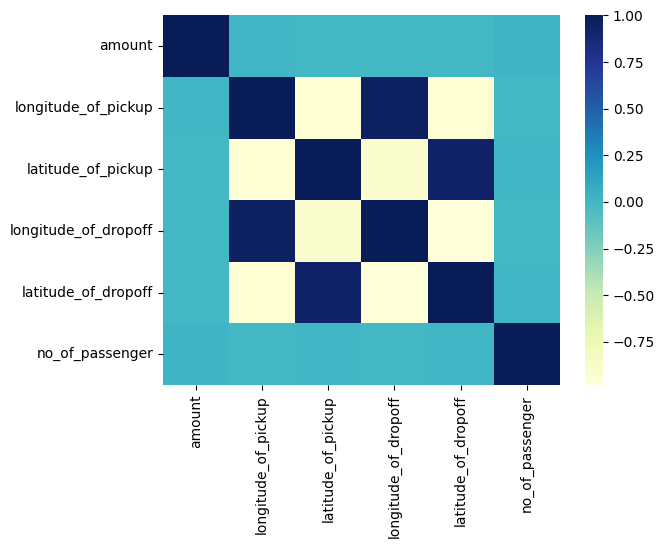

In [302]:
sns.heatmap(corr,cmap="YlGnBu")

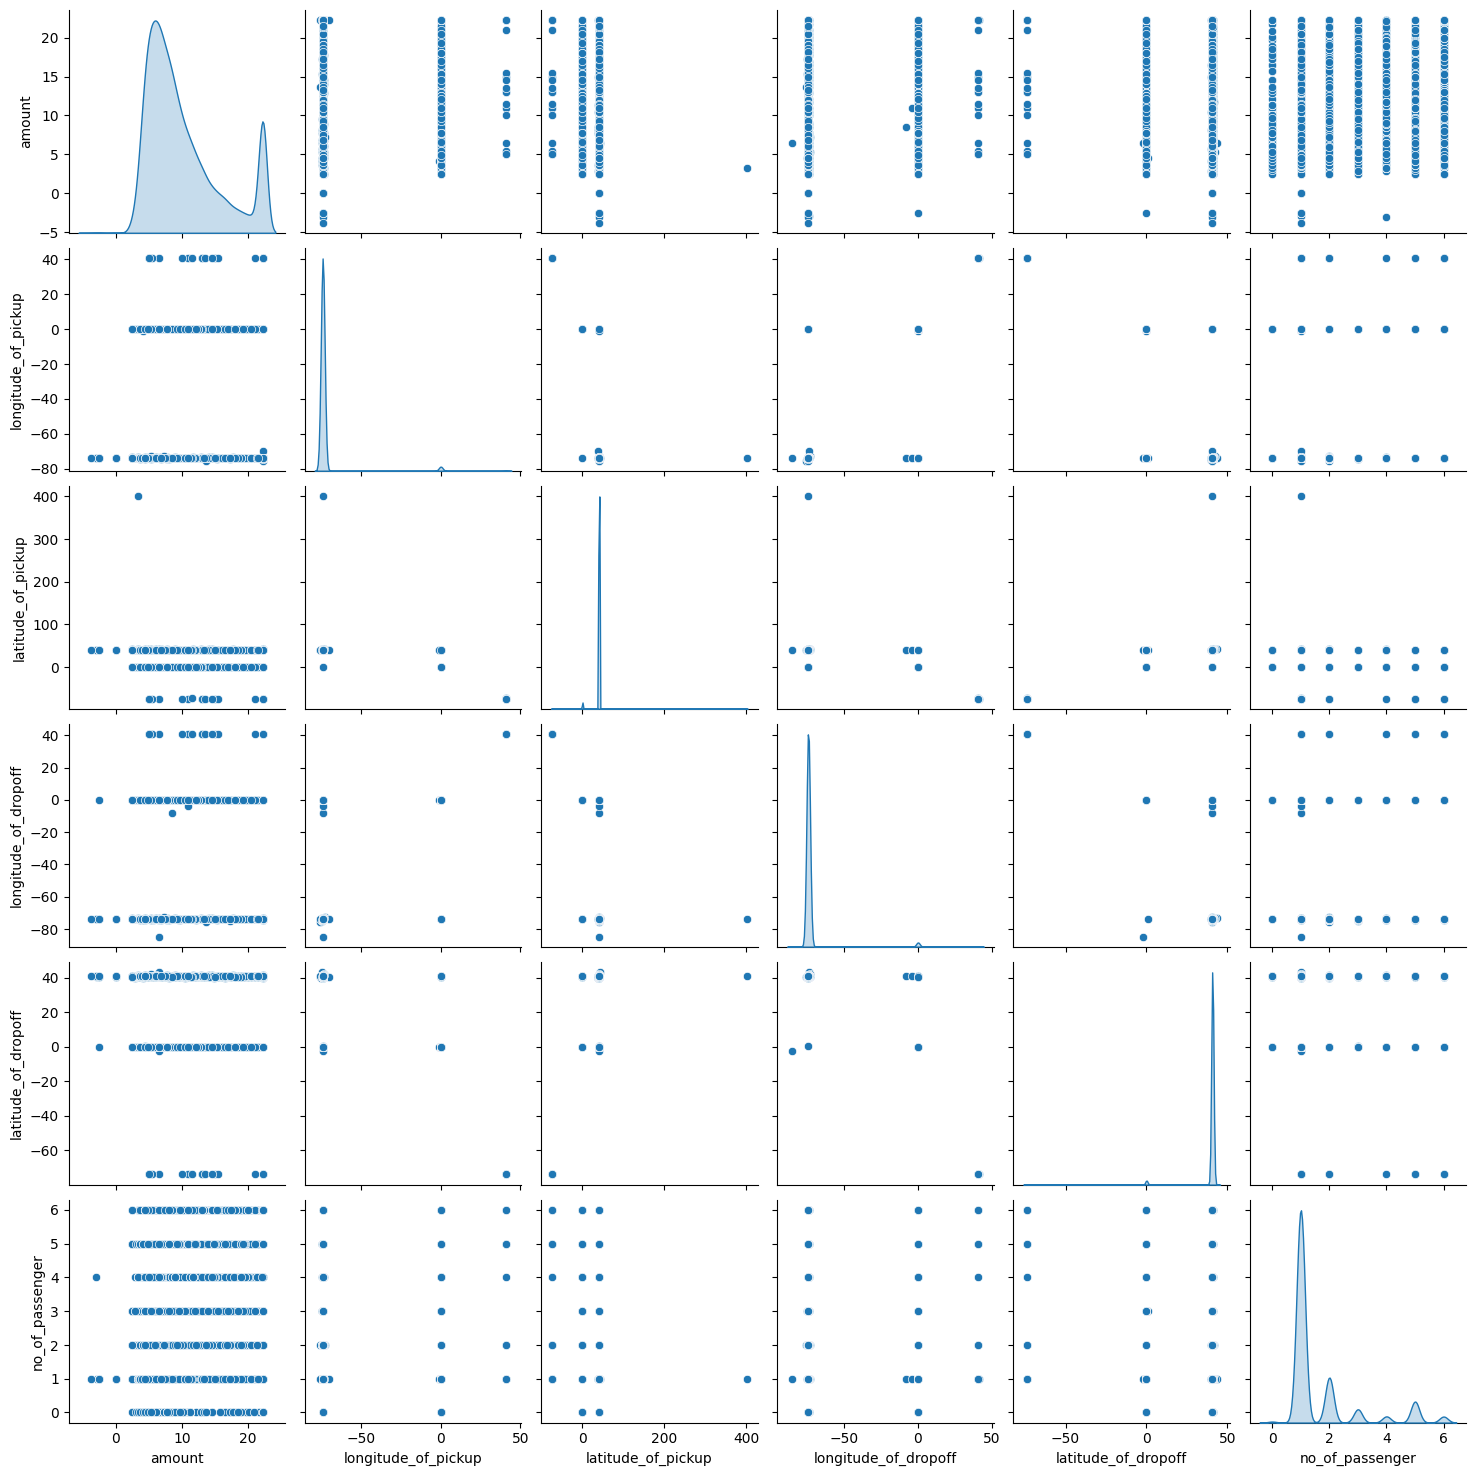

In [303]:
sns.pairplot(tf,diag_kind="kde")

In [304]:
tf_1.rename(columns={"pickup_longitude":"longitude_of_pickup","pickup_latitude":"latitude_of_pickup","dropoff_longitude":"longitude_of_dropoff","dropoff_latitude":"latitude_of_dropoff","passenger_count":"no_of_passenger"},inplace=True) 
tf_1.head()

,key,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,2015-01-27 13:08:24.0000002,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,-73.966046,40.789775,-73.988565,40.744427,1


In [305]:
from sklearn import linear_model

In [306]:
x_train=tf.drop("amount",axis=1)
y_train=tf["amount"]
x_test=tf_1.drop("key",axis=1)

In [307]:
model=linear_model.LinearRegression()

In [308]:
model.fit(x_train,y_train)

LinearRegression()

In [309]:
model.score(x_train,y_train)

0.0005530556296454714

In [310]:
y_predict=model.predict(x_train)
y_predict

array([10.05294925, 10.05452481, 10.13401749, ..., 10.05490844,
       10.13254454, 10.0531419 ])

In [311]:
from sklearn.metrics import mean_squared_error

In [312]:
mse=mean_squared_error(y_train,y_predict)
mse

29.842574474442237

In [313]:
s1=0
for i in range(len(y_train)):
  s1+=y_train[i]

print(s1/len(x_train))

10.1071262


In [314]:
s2=0
for i in range(len(x_train)):
  s2+=(y_train[i]-s1)*(y_train[i]-s1)

In [315]:
var=s2/len(x_train)
var

255374784788.8326

In [316]:
R=np.sqrt(1-mse/var)
R ### so the model is perfect as performance is approaching to 1

0.999999999941571

In [317]:
a=model.coef_
a

array([ 0.00805897, -0.0198488 , -0.0272659 , -0.01423556,  0.07944195])

In [318]:
b=model.intercept_
b

9.943089606624586

In [319]:
x_test

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982524,40.751260,-73.979654,40.746139,1
3,-73.981160,40.767807,-73.990448,40.751635,1
4,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


In [320]:
fare_amount=b+a[0]*tf_1.longitude_of_pickup+a[1]*tf_1.latitude_of_pickup+a[2]*tf_1.longitude_of_dropoff+a[3]*tf_1.latitude_of_dropoff+a[4]*tf_1.no_of_passenger
fare_amount

0       10.054429
1       10.055744
2       10.054523
3       10.054422
4       10.054159
          ...    
9909    10.449799
9910    10.450032
9911    10.448382
9912    10.450127
9913    10.452009
Length: 9914, dtype: float64

In [321]:
s3=0
for i in range(len(x_test)):
  s3+=fare_amount[i]

print(s3/len(x_test))

10.107674119416602


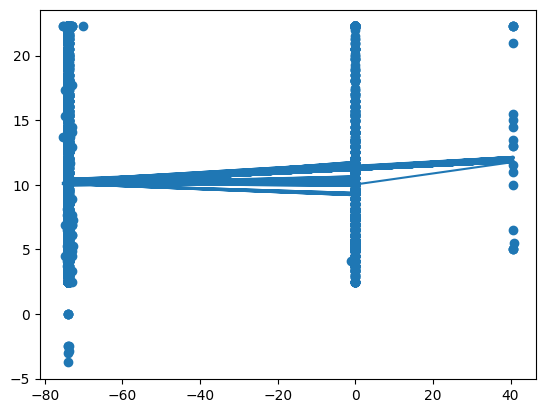

In [322]:
plt.scatter(tf.longitude_of_pickup,y_train)
plt.plot(tf.longitude_of_pickup,y_predict)
plt.show()

In [323]:
from sklearn.tree import DecisionTreeRegressor

In [324]:
model1= DecisionTreeRegressor(criterion='squared_error')
model1.fit(x_train,y_train)

DecisionTreeRegressor()

In [325]:
model1.score(x_train,y_train)

0.9803600397864084

In [326]:
y_predict_1=model1.predict(x_train)
y_predict_1

array([ 4.5, 16.9,  5.7, ...,  6.9,  4.5, 10.9])

In [327]:
mse_1=mean_squared_error(y_train,y_predict_1)
mse_1

0.5864313044835349

In [328]:
R_1=np.sqrt(1-mse_1/var)
R_1

0.9999999999988518

fare_amount_1=model1.predict(x_test)
fare_amount_1

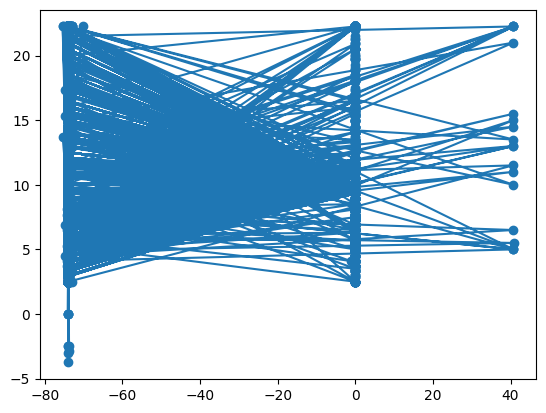

In [329]:
plt.scatter(tf.longitude_of_pickup,y_train)
plt.plot(tf.longitude_of_pickup,y_predict_1)
plt.show()

In [330]:
from sklearn.ensemble import BaggingRegressor

In [331]:
model2=BaggingRegressor(n_estimators=200)
model2.fit(x_train,y_train)

BaggingRegressor(n_estimators=200)

In [332]:
model2.score(x_train,y_train)

0.9517334827793805

In [333]:
y_predict_2=model2.predict(x_train)
y_predict_2

array([ 5.906  , 17.63275,  5.978  , ...,  8.0225 ,  4.6275 ,  8.99655])

In [334]:
mse_2=mean_squared_error(y_train,y_predict_2)
mse_2

1.4411941953414318

In [335]:
R_2=np.sqrt(1-mse_2/var)
R_2

0.9999999999971783

In [336]:
fare_amount_2=model2.predict(x_test)
fare_amount_2

array([ 8.429  ,  9.177  ,  4.8875 , ..., 22.11025, 15.62   ,  6.604  ])

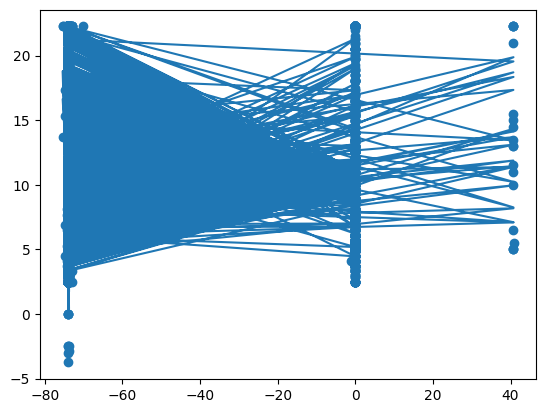

In [337]:
plt.scatter(tf.longitude_of_pickup,y_train)
plt.plot(tf.longitude_of_pickup,y_predict_2)
plt.show()

In [338]:
from sklearn.ensemble import AdaBoostRegressor

In [339]:
model3=AdaBoostRegressor(n_estimators=2000,learning_rate=0.000001)
model3.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=1e-06, n_estimators=2000)

In [340]:
model3.score(x_train,y_train)

0.36111518822051203

In [341]:
y_predict_3=model3.predict(x_train)
y_predict_3

array([13.64029271,  8.76547388,  8.76547388, ...,  8.76547388,
        8.76547388, 13.64029271])

In [342]:
mse_3=mean_squared_error(y_train,y_predict_3)
mse_3

19.07651795176664

In [343]:
R_3=np.sqrt(1-mse_3/var)
R_3

0.9999999999626499

In [344]:
fare_amount_3=model3.predict(x_test)
fare_amount_3

array([ 8.76547388,  8.76547388,  8.76547388, ..., 21.54620954,
       17.57859562,  8.76547388])

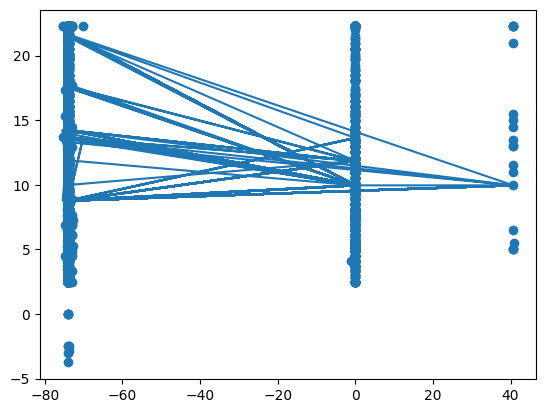

In [345]:
plt.scatter(tf.longitude_of_pickup,y_train)
plt.plot(tf.longitude_of_pickup,y_predict_3)
plt.show()

In [346]:
from sklearn.svm import SVR

In [347]:
model4=SVR()
model4.fit(x_train,y_train)

SVR()

In [348]:
model4.score(x_train,y_train)

-0.09402565831113918

In [349]:
y_predict_4=model4.predict(x_train)
y_predict_4

array([8.40673818, 8.3993685 , 8.43921734, ..., 8.39882285, 8.44151125,
       8.40224971])

In [350]:
mse_4=mean_squared_error(y_train,y_predict_4)
mse_4

32.66660863690893

In [351]:
R_4=np.sqrt(1-mse_4/var)
R_4

0.9999999999360418

In [352]:
fare_amount_4=model4.predict(x_test)
fare_amount_4

array([8.39956839, 8.39941191, 8.399447  , ..., 8.60000362, 8.60134523,
       8.59940581])

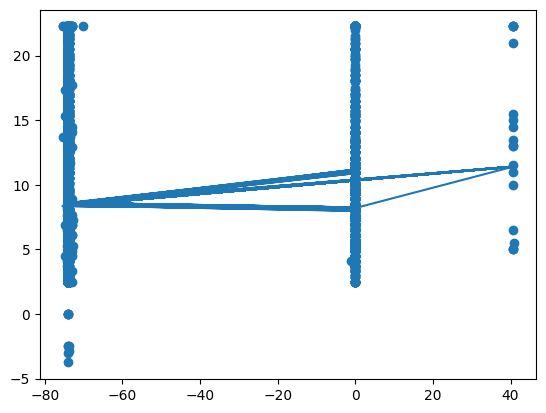

In [353]:
plt.scatter(tf.longitude_of_pickup,y_train)
plt.plot(tf.longitude_of_pickup,y_predict_4)
plt.show()

In [354]:
key=tf_1["key"]
key

0       2015-01-27 13:08:24.0000002
1       2015-01-27 13:08:24.0000003
2       2011-10-08 11:53:44.0000002
3       2012-12-01 21:12:12.0000002
4       2012-12-01 21:12:12.0000003
                   ...             
9909    2015-05-10 12:37:51.0000002
9910    2015-01-12 17:05:51.0000001
9911    2015-04-19 20:44:15.0000001
9912    2015-01-31 01:05:19.0000005
9913    2015-01-18 14:06:23.0000006
Name: key, Length: 9914, dtype: object

In [355]:
sub=key.to_frame()
sub.insert(1,"fare_amount",fare_amount,True)
sub.to_csv("NYC TAXI FARE.csv")